In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from preprocessing_helper import *

import constants

## 1. Load in preprocessed data

Preprocessing route data for GradeNet

In [2]:
with open(constants.DATA_DIR / "moonGen_scrape_2016_cp", "rb") as f:
    MoonBoard_2016_withurl = pickle.load(f)

In [3]:
X_path_all = [
    constants.PREPROCESSING_DIR / "benchmark_withgrade_move_seq_X",
    constants.PREPROCESSING_DIR / "benchmark_nograde_move_seq_X",
    constants.PREPROCESSING_DIR / "nonbenchmark_withgrade_move_seq_X",
    constants.PREPROCESSING_DIR / "nonbenchmark_nograde_move_seq_X",
]
Y_path_all = [
    constants.PREPROCESSING_DIR / "benchmark_withgrade_move_seq_Y",
    constants.PREPROCESSING_DIR / "benchmark_nograde_move_seq_Y",
    constants.PREPROCESSING_DIR / "nonbenchmark_withgrade_move_seq_Y",
    constants.PREPROCESSING_DIR / "nonbenchmark_nograde_move_seq_Y",
]

In [4]:
# TODO: why bother separating dicts if we're just going to merge them again
X_seq_dict_merge = {}
Y_seq_dict_merge = {}
for path in X_path_all:
    with open(path, "rb") as f:
        read_dict = pickle.load(f)
    X_seq_dict_merge = {**X_seq_dict_merge, **read_dict}
for path in Y_path_all:
    with open(path, "rb") as f:
        read_dict = pickle.load(f)
    Y_seq_dict_merge = {**Y_seq_dict_merge, **read_dict}

KeyboardInterrupt: 

### 1-1. remove data from fail list and save

In [5]:
fail_list = [
    "363336",
    "363335",
    "350368",
    "349610",
    "349049",
    "348915",
    "348858",
    "348670",
    "348669",
    "348432",
    "346738",
    "344743",
    "339916",
    "339325",
    "337916",
    "335566",
    "312004",
    "310949",
    "309657",
    "309311",
    "248997",
    "246092",
    "231401",
    "231392",
    "19362",
    "360322",
    "356219",
    "322560",
    "311585",
    "309230",
    "308089",
]

In [6]:
for key in fail_list:
    try:
        del X_seq_dict_merge[key]
    except:
        pass
    try:
        del Y_seq_dict_merge[key]
    except:
        pass
assert len(X_seq_dict_merge) == len(Y_seq_dict_merge)

In [ ]:
# Skip the above just load these dicts

In [8]:
save_pickle(X_seq_dict_merge, constants.PREPROCESSING_DIR / "X_seq_dict_merge")
save_pickle(Y_seq_dict_merge, constants.PREPROCESSING_DIR / "Y_seq_dict_merge")

In [10]:
ex = next(iter(X_seq_dict_merge.values()))
print(ex.shape)
ex

(22, 5)


array([[ 5.        ,  8.        ,  5.        ,  3.        ,  1.        ],
       [ 6.        , 10.        , 13.        , 16.        , 17.        ],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ],
       [ 5.        ,  6.        ,  8.        ,  4.        ,  9.        ],
       [10.        ,  5.        ,  8.        ,  5.        ,  3.        ],
       [ 4.        ,  6.        , 10.        , 13.        , 16.        ],
       [ 9.        ,  5.        ,  6.        ,  8.        ,  4.        ],
       [-5.        ,  3.        , -3.        , -2.        , -2.        ],
       [ 2.        ,  4.        ,  3.        ,  3.        ,  1.        ],
       [10.        , 10.        ,  5.        ,  8.        ,  5.        ],
       [ 4.        ,  4.        ,  6.        , 10.        , 13.        ],
       [ 9.        ,  9.        ,  5.        ,  6.        ,  8.        ],
       [-5.        , -2.        ,  0.        , -5.        , -4.        ],
       [ 2.        ,  6.        ,  7. 

## 2. Partition to train/dev/test set

### 2-1. convert to matrix form

In [8]:
n_sample = len(Y_seq_dict_merge)
X_seq_data_merge = np.zeros((n_sample, 12, 22))
Y_seq_grade_merge = np.zeros(n_sample)
keys_seq_merge = []
tmax_seq_merge = np.zeros(n_sample)

i = 0
for key, value in X_seq_dict_merge.items():
    X_data = value.T
    X_seq_data_merge[i, 0:X_data.shape[0], :] = X_data
    Y_seq_grade_merge[i] = Y_seq_dict_merge[key]
    keys_seq_merge.append(key)
    tmax_seq_merge[i] = X_data.shape[0]
    i = i + 1

In [25]:
X_seq_data_merge[0]

array([[ 5.        ,  6.        ,  0.        ,  5.        , 10.        ,
         4.        ,  9.        , -5.        ,  2.        , 10.        ,
         4.        ,  9.        , -5.        ,  2.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        , 12.15080939],
       [ 8.        , 10.        ,  1.        ,  6.        ,  5.        ,
         6.        ,  5.        ,  3.        ,  4.        , 10.        ,
         4.        ,  9.        , -2.        ,  6.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  4.37647724],
       [ 5.        , 13.        ,  0.        ,  8.        ,  8.        ,
        10.        ,  6.        , -3.        ,  3.        ,  5.        ,
         6.        ,  5.        ,  0.        ,  7.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        , 24.02025112],
       [ 3.        

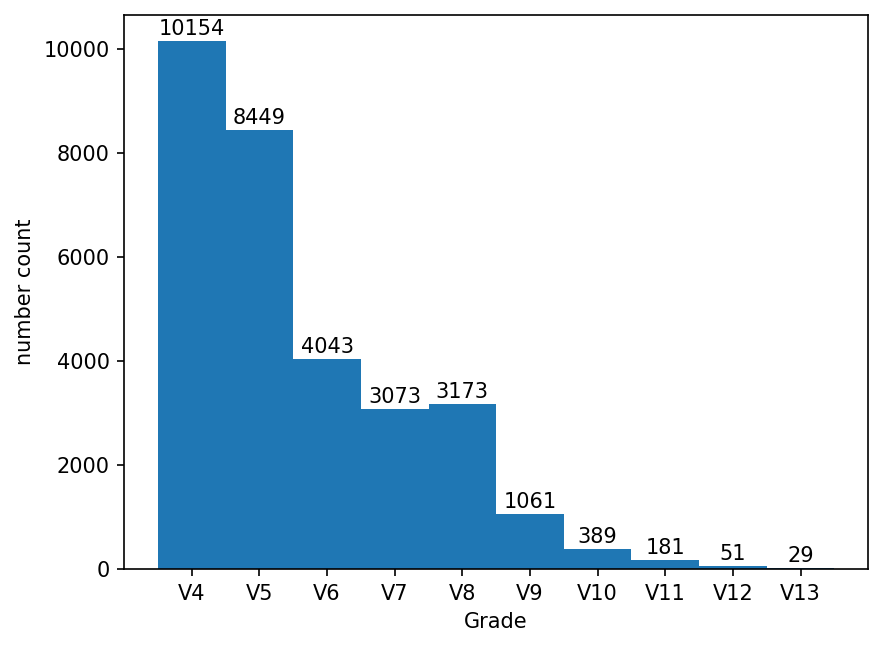

In [9]:
plt.figure(dpi = 150)
result = plt.hist(Y_seq_grade_merge, bins = np.arange(11)-0.5)
for x,y in zip(np.arange(10),result[0]):
    label = str(int(y))
    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,3),
                 ha='center')
plt.xticks(np.arange(10), ['V4','V5','V6','V7','V8','V9','V10','V11','V12','V13'])
plt.xlabel('Grade')
plt.ylabel('number count')
plt.show()

### 2-2. Partition

In [10]:
n_dev = 3000
n_test = 3000
n_train = n_sample - n_dev - n_test
print(n_train)

24603


In [11]:
np.random.seed(0)
shuffle = np.random.choice(np.arange(n_sample), n_sample, replace = False)

In [12]:
X_seq_shuffle = X_seq_data_merge[shuffle, :, :]
Y_seq_shuffle = Y_seq_grade_merge[shuffle]
keys_seq_shuffle = np.array(keys_seq_merge)[shuffle]
tmax_seq_shuffle = tmax_seq_merge[shuffle]

In [13]:
training_set_seq = {'X': X_seq_shuffle[0:n_train], 
                'Y': Y_seq_shuffle[0:n_train], 
                'keys': keys_seq_shuffle[0:n_train], 
                'tmax': tmax_seq_shuffle[0:n_train]}
dev_set_seq = {'X': X_seq_shuffle[n_train:n_train+n_dev], 
                'Y': Y_seq_shuffle[n_train:n_train+n_dev], 
                'keys': keys_seq_shuffle[n_train:n_train+n_dev], 
                'tmax': tmax_seq_shuffle[n_train:n_train+n_dev]}
test_set_seq = {'X': X_seq_shuffle[n_train+n_dev:], 
                'Y': Y_seq_shuffle[n_train+n_dev:],  
                'keys': keys_seq_shuffle[n_train+n_dev:], 
                'tmax': tmax_seq_shuffle[n_train+n_dev:]}

In [43]:
# training_set_path = constants.PREPROCESSING_DIR / 'training_set_seq_12'
# dev_set_path = constants.PREPROCESSING_DIR / 'dev_set_seq_12'
# test_set_path = constants.PREPROCESSING_DIR / 'test_set_seq_12'
# save_pickle(training_set_seq, training_set_path)
# save_pickle(dev_set_seq, dev_set_path)
# save_pickle(test_set_seq, test_set_path)

### 2-3. remove problem in dev & test sets that has 0 repeat

In [14]:
del_list = []
for key in training_set_seq['keys']:
    if MoonBoard_2016_withurl[key]['repeats'] == 0:
        del_list.append(key)

del_list_devtest = []
for key in dev_set_seq['keys']:
    if MoonBoard_2016_withurl[key]['repeats'] == 0:
        del_list_devtest.append(key)
for key in test_set_seq['keys']:
    if MoonBoard_2016_withurl[key]['repeats'] == 0:
        del_list_devtest.append(key)

In [15]:
row_rm = []
for i, key in enumerate(training_set_seq['keys']):
    if key in del_list:
        row_rm.append(i)

training_set_seq['X'] = np.delete(training_set_seq['X'], row_rm, 0)
training_set_seq['Y'] = np.delete(training_set_seq['Y'], row_rm)
training_set_seq['keys'] = np.delete(training_set_seq['keys'], row_rm)
training_set_seq['tmax'] = np.delete(training_set_seq['tmax'], row_rm)

In [16]:
row_rm_dev = []
for i, key in enumerate(dev_set_seq['keys']):
    if key in del_list_devtest:
        row_rm_dev.append(i)

dev_set_seq['X'] = np.delete(dev_set_seq['X'], row_rm_dev, 0)
dev_set_seq['Y'] = np.delete(dev_set_seq['Y'], row_rm_dev)
dev_set_seq['keys'] = np.delete(dev_set_seq['keys'], row_rm_dev)
dev_set_seq['tmax'] = np.delete(dev_set_seq['tmax'], row_rm_dev)

row_rm_test = []
for i, key in enumerate(test_set_seq['keys']):
    if key in del_list_devtest:
        row_rm_test.append(i)

test_set_seq['X'] = np.delete(test_set_seq['X'], row_rm_test, 0)
test_set_seq['Y'] = np.delete(test_set_seq['Y'], row_rm_test)
test_set_seq['keys'] = np.delete(test_set_seq['keys'], row_rm_test)
test_set_seq['tmax'] = np.delete(test_set_seq['tmax'], row_rm_test)

#### Visualize the new distribution of data after removing 0 repeat problems

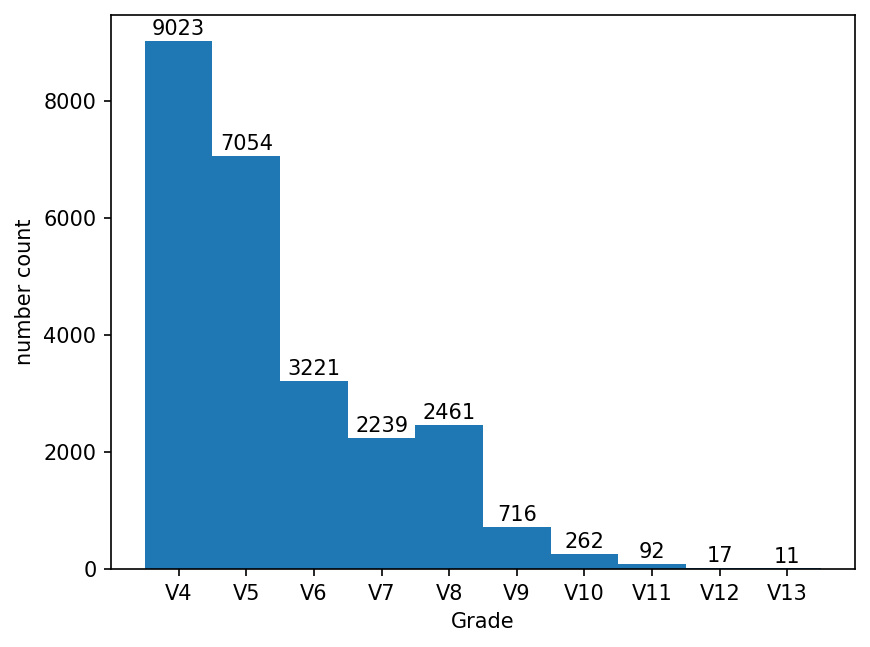

In [17]:
plt.figure(dpi = 150)
result = plt.hist(np.hstack([training_set_seq['Y'], dev_set_seq['Y'], test_set_seq['Y']]), bins = np.arange(11)-0.5)
for x,y in zip(np.arange(10),result[0]):
    label = str(int(y))
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,3),
                 ha='center')
plt.xticks(np.arange(10), ['V4','V5','V6','V7','V8','V9','V10','V11','V12','V13'])
plt.xlabel('Grade')
plt.ylabel('number count')
plt.show()

In [83]:
# training_set_path = constants.PREPROCESSING_DIR / 'training_set_seq_12_rmrp0'
# dev_set_path = constants.PREPROCESSING_DIR / 'dev_set_seq_12_rmrp0'
# test_set_path = constants.PREPROCESSING_DIR / 'test_set_seq_12_rmrp0'
# save_pickle(training_set_seq, training_set_path)
# save_pickle(dev_set_seq, dev_set_path)
# save_pickle(test_set_seq, test_set_path)

### 2-4. normalization

In [26]:
print(test_set_seq['X'].shape)

(2497, 12, 22)


In [21]:
training_seq_normalized = normalization(training_set_seq)
dev_seq_normalized = normalization(dev_set_seq)
test_seq_normalized = normalization(test_set_seq)



In [24]:
test_seq_normalized['X'].shape

(2497, 12, 22)

### 2-5. save

In [82]:
training_normalized_set_path = constants.PREPROCESSING_DIR / 'training_seq_n_12_rmrp0'
dev_normalized_set_path = constants.PREPROCESSING_DIR / 'dev_seq_n_12_rmrp0'
test_normalized_set_path = constants.PREPROCESSING_DIR / 'test_seq_n_12_rmrp0'
save_pickle(training_seq_normalized, training_normalized_set_path)
save_pickle(dev_seq_normalized, dev_normalized_set_path)
save_pickle(test_seq_normalized, test_normalized_set_path)